## Salary estimation using K-NEAREST NEIGHBOUR
## Yada Roshik

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('salary.csv',encoding='latin1')

In [3]:
df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [4]:
print(df.shape)

(32561, 5)


In [5]:
print(df.head(5))

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


## Mapping Data from text to Binary numbers ( income column)

In [6]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
df.head(20)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


## Segragate the date in to X and y depending on independent and dependent variable

In [7]:
X = df.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [8]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

## Splitting dataset in to train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state = 0)

## Feature scaling
#### we scale our data to make all the features contribute equally to the result
#### Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
#### Transform - Transform method is transforming all the features using the respective mean and variance, 
#### We want our test data to be a completely new and a surprise set for our model

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

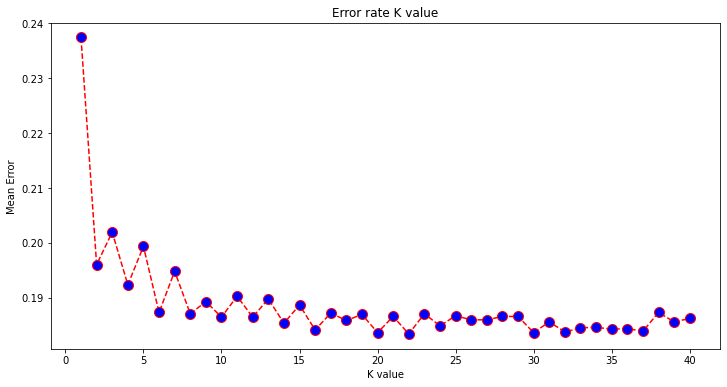

In [11]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for K values between 1 and 40
for i in range(1,40+1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize =(12,6))
plt.plot(range(1,41),error,color = 'red',linestyle = 'dashed',marker ='o',
        markerfacecolor='blue',markersize =10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

## Training

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 37, metric= 'minkowski', p = 2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=37)

## Predicting whether new customer with age and salary will buy or not

In [15]:
age = int(input('Enter age :'))
edu = int(input('Enter Education :'))
cg = int(input('Capital Gain :'))
wh = int(input('Working hours per week  :'))

newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))

if result:
    print("Employee might got salary above 50k")
else:
    print("Employee might not got salary above 50k")

Enter age :40
Enter Education :6
Capital Gain :0
Working hours per week  :54
Employee might not got salary above 50k


## Predicting for all test data

In [16]:
y_pred = model.predict(X_test)
print(np.concatenate( (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating Model , confusion model and accurary score

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[5849  344]
 [1153  795]]


In [19]:
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 81.61159562707284%
